In [9]:
#### installing necessary libraries
#! python3 -m spacy download en_core_web_lg
# ! pip install paddlepaddle == 2.0
# ! pip install paddleocr 
# ! pip install borb==2.0.27
# ! pip install pytesseract
# ! pip install ftfy
# ! pip install tesseract
# ! sudo apt install tesseract-ocr
# ! pip install keras-ocr
# ! python -m pip install spacy
# ! pip install nltk
# ! pip install pyforest
# ! sudo apt-get install tesseract-ocr
# ! pip install pytesseract==0.3.9
# #! python -m spacy train config.cfg --output ./models --paths.train ./train.spacy --paths.dev ./dev.spacy
# ! pip install datefinder
# ! pip install pillow
# ! pip install lexnlp

In [10]:
# print("Restarting of kernel...") 
# get_ipython().kernel.do_shutdown(True)

In [11]:
#### importing libraries
# !apt -qqy install xorg python3-pip
!pip install paddlepaddle paddleocr
!pip install -U numpy
from pyforest import *
import cv2
import numpy as np
import pytesseract
from PIL import Image
import imutils
from imutils.perspective import four_point_transform
import argparse
import re
from PIL import Image
from matplotlib import pyplot as plt
import os
from paddleocr import PaddleOCR, draw_ocr 
import random
%matplotlib inline
import sys
import nltk
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#### path to files and dataset
path = '/content/drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Final Project/installation files/'
sys.path.append(path)
jpg_path = path+'files/jpg/'
imgnumber = '39'

In [13]:
#### Using tesseract to extract text (extract as a whole)

def getString(img):
    # result = pytesseract.image_to_string(Image.open(src_path + "thres.png"))
    result = pytesseract.image_to_string(img)
    return result

img = cv2.imread(jpg_path + imgnumber + '.jpg')
print ('.= extracting Text from original image using Tesseract =.')
print('-'*60)
text = getString(img)
print (text)
print('-'*60)
display(text.split("\n"))

.= extracting Text from original image using Tesseract =.
------------------------------------------------------------
MAHAVEERS CHEFS CHOICE

( KING GEORGE BLVD
SURREY, BC V3T 2H6

ua005648419
Clerk ID: 1
2548616560018

Purchase

Visa CREDIT
KXXXKXKKAKKKL315
AID: AGOABOROO31010
Entry Nethod: Waved
Batchi: G00048
04730720 18:58:14

Ref: 000014484064
Inv t: 080697? Appr Codes 049060

Anount: § 30.18
Tip: § 0.00

Total: Mle

IVR: 00 66 BO BB BO
1S): 06 88

Customer Copy _

 

~~,

------------------------------------------------------------


['MAHAVEERS CHEFS CHOICE',
 '',
 '( KING GEORGE BLVD',
 'SURREY, BC V3T 2H6',
 '',
 'ua005648419',
 'Clerk ID: 1',
 '2548616560018',
 '',
 'Purchase',
 '',
 'Visa CREDIT',
 'KXXXKXKKAKKKL315',
 'AID: AGOABOROO31010',
 'Entry Nethod: Waved',
 'Batchi: G00048',
 '04730720 18:58:14',
 '',
 'Ref: 000014484064',
 'Inv t: 080697? Appr Codes 049060',
 '',
 'Anount: § 30.18',
 'Tip: § 0.00',
 '',
 'Total: Mle',
 '',
 'IVR: 00 66 BO BB BO',
 '1S): 06 88',
 '',
 'Customer Copy _',
 '',
 ' ',
 '',
 '~~,',
 '\x0c']

[2022/11/07 22:54:10] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
['MAHAVEERS CHEFS CHOICE', '10227 KING GEORGE BLVD', 'SURREY.BC V3T 2W6', 'Merchant I0: 000000005648419', 'Te1D:04623094', 'C1erkID:1', '25481650018', 'Purchase', 'Visa CREDIT', 'XXXXXXXXXXXX1315', 'AID:A0000000031010', 'Entry Method: Waved', 'BatchH:000048', '04/30/20', '18:58:14', 'Ref#:000014484064', 'Inv H:000697 Appr Code:049060', 'Amount:', '30.18', 'Tip:', '0.00', 'Total:', '30.18', 'TVR:00 00 00 00 00', '1S1:0000']


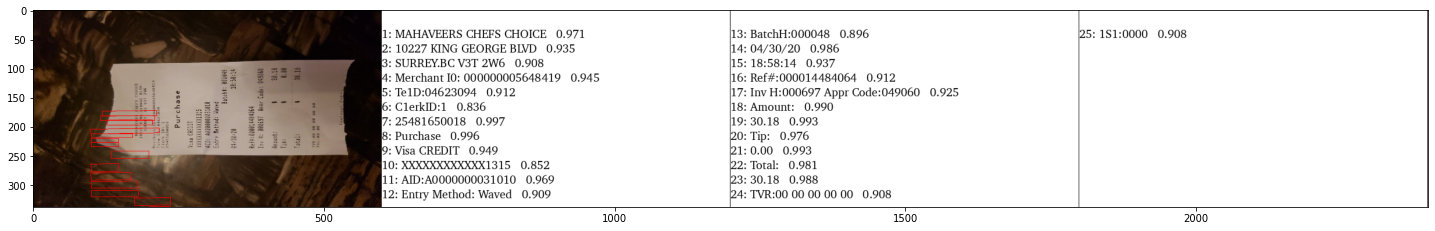

In [14]:
#### paddle ocr approach

def getPaddle(img_path):
  ocr_model = PaddleOCR(lang='en')
  %matplotlib inline
  result = ocr_model.ocr(img_path)
  # draw result
  result = result[0]
  image = Image.open(img_path).convert('RGB')
  boxes = [line[0] for line in result]
  txts = [line[1][0] for line in result]
  scores = [line[1][1] for line in result]
  font_path = os.path.join(path, 'fonts/', 'latin.ttf')
  print(txts)
  # Visualize our image and detections
  plt.figure(figsize=(25,18))
  im_show = draw_ocr(image, boxes, txts, scores, font_path=font_path)
  im_show = Image.fromarray(im_show)
  plt.imshow(im_show) 

filename = imgnumber + '.jpg'
img_path = jpg_path + filename
getPaddle(img_path)

In [15]:
# #### Paddle OCR Image extraction 
# """loading all images"""
# def loadImagesFromjpg(directory: str = 'files/jpg'):
#     print("loading invoices from", directory)
#     subDirectories = os.listdir(directory)
#     images = dict()
#     for subdir in subDirectories:
#         path = f'{directory}/{subdir}'
#         if not os.path.isdir(path):
#             continue
#         files = os.listdir(path)
#         for file in files:
#             if not file.endswith('.jpg'):
#                 continue
#             filename = f'{path}/{file}'
#             images[filename] = subdir

#     return getImgData(images)

# """extracting images"""
# def getImgText(filename: str):
#   ocr_model = PaddleOCR(lang='en', show_log=False)
#   sentence = ''
#   result = ocr_model.ocr(filename)
#   result = result[0]
#   for res in result:
#       sentence += res[1][0] + '\n'
#   sentence = sentence[:len(sentence)]
#   return sentence

# def findInText(pattern, text, flags=0, group=0):
#     match = re.search(pattern, text, flags)
#     if match:
#         return match.group(group)
#     return ''

# def getImgDate(receipt_text):
#   patterns = [
#     # "Jan 21,20", "Jan 21,2020", "Jan 21 20", "Jan 21, 2020", "Jan 21, 20"
#     #  "Jan 21.20", "Jan 21.2020", "Jan 21. 2020", "Jan 21. 20"
#     (r"((?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)\s?[0-9]{1,2}(?:,|\.|\s)\s?[0-9]{2,4})\s", 1, re.IGNORECASE),
#     # "11/27/19", "12/14/2019", "2020-01-07", "20-01-2017"
#     (r'([0-9]{1,4}(?:-|\/)[0-9]{1,2}(?:-|\/)[0-9]{1,4})', 1, 0),
#     # "20-Jun-2020"
#     (r'([0-9]{1,4}(?:-|\/| )(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)(?:-|\/| )[0-9]{1,4})', 1, re.IGNORECASE)
#   ]
#   date = None
#   for pattern, group, flags in patterns:
#     date = findInText(pattern, receipt_text, flags, group)
#     if len(date) > 0:
#       break
#   return date

# def getImgTotal(receipt_text):
#   patterns = [
#     (r'\s(?:payable):?\s?((?:CA)??\$?\d+.\d+)',1, re.IGNORECASE),
#     (r'\n(?:(?:here )?total|totaldue|paid|tl|cash|Tctal|Totai):?\s?((?:CA)?(?:DS)?\$?\d+.\d+)',1, re.IGNORECASE),
#     (r'\n(?:amount):?\s?((?:CA)??\$?\d+.\d+)',1, re.IGNORECASE),
#     (r'(\$?\d+.\d+)\s(?:amount|total)', 1, re.IGNORECASE)
#   ]
#   total = None
#   for pattern, group, flag in patterns:
#     total = findInText(pattern, receipt_text, flag, group)
#     if len(total) > 0:
#       break
#   return total

# """main image extraction function"""
# def getImgData(images):
#     data = []
#     for image, type in images.items():
#         print('Extracting info from image:', image)
#         filename = image.split('/')[-1]
#         text = getImgText(image)
#         total = getImgTotal(text)
#         totalStartIndex = text.find(total)
#         totalEndIndex = text.find(total) + len(total)
#         date = getImgDate(text)
#         dateStartIndex = text.find(date)
#         dateEndIndex = text.find(date) + len(date)

#         if type == '1': # Name in first line
#             businessName = text.split('\n')[0]
#             businessStartIndex = text.find(businessName)
#             businessEndIndex = text.find(businessName) + len(businessName)
#         elif type == '1-2': # Name in first and second line
#             businessName = text.split('\n')[0] + ' ' + text.split('\n')[1]
#             businessStartIndex = text.find(businessName.split(' ')[0])
#             businessEndIndex = text.find(businessName.split(' ')[0]) + len(businessName)
#         elif type == '2': # Name in second line
#             businessName = text.split('\n')[1]
#             businessStartIndex = text.find(businessName)
#             businessEndIndex = text.find(businessName) + len(businessName)
#         elif type == '2-3': # Name in second and third line
#             businessName = text.split('\n')[1] + ' ' + text.split('\n')[2]
#             businessStartIndex = text.find(businessName.split(' ')[0])
#             businessEndIndex = text.find(businessName.split(' ')[0]) + len(businessName)
#         elif type == '3': # Name in third line
#             businessName = text.split('\n')[2]
#             businessStartIndex = text.find(businessName)
#             businessEndIndex = text.find(businessName) + len(businessName)
#         elif type == '5-down': # Name 5 lines down
#             businessName = text.split('\n')[4]
#             businessStartIndex = text.find(businessName)
#             businessEndIndex = text.find(businessName) + len(businessName)
#         elif type == '5-up': # Name 5 lines up
#             businessName = text.split('\n')[-6]
#             businessStartIndex = text.find(businessName)
#             businessEndIndex = text.find(businessName) + len(businessName)
#         else: # No name
#             businessName = ''
#             businessStartIndex = ''
#             businessEndIndex = ''
        
#         invoiceInfo = {
#             'filename': filename,
#             'text': text,
#             'date': date,
#             'dateStartIndex': dateStartIndex,
#             'dateEndIndex': dateEndIndex,
#             'businessName': businessName,
#             'businessStartIndex': businessStartIndex,
#             'businessEndIndex': businessEndIndex,
#             'total': total,
#             'totalStartIndex': totalStartIndex,
#             'totalEndIndex': totalEndIndex
#         }
#         data.append(invoiceInfo)
        
#     return data

In [16]:
# extracting info from JPG invoices to create training dataset
# img_data = loadImagesFromjpg(path +'files/jpg')
# img_data

In [17]:
#### paddleOCR Image extraction 
"""loading all images"""
def loadImagesFromjpg(directory: str = 'files/jpg'):
    print("loading invoices from", directory)
    subDirectories = os.listdir(directory)
    images = dict()
    for subdir in subDirectories:
        path = f'{directory}/{subdir}'
        if not os.path.isdir(path):
            continue
        files = os.listdir(path)
        for file in files:
            if not file.endswith('.jpg'):
                continue
            filename = f'{path}/{file}'
            images[filename] = subdir

    return getImgText(images)

"""extracting text from images"""
def getImgText(images):
  """dictionary of image text"""
  image_text = {}
  for image, type in images.items():
    ocr_model = PaddleOCR(lang='en', show_log=False)
    sentence = ''
    result = ocr_model.ocr(image)
    result = result[0]
    for res in result:
        sentence += ' ' + res[1][0] + ' '
    #sentence = sentence[:len(sentence)]
    image_text[image[-95:]] = sentence
  return image_text

image_text = loadImagesFromjpg(path +'files/jpg')
image_text

loading invoices from /content/drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Final Project/installation files/files/jpg
[2022/11/07 22:54:14] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/07 22:54:18] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/07 22:54:21] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/07 22:54:32] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/07 22:54:39] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/07 22:54:43] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forw

{'drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Final Project/installation files/files/jpg/1/39.jpg': ' MAHAVEERS CHEFS CHOICE  10227 KING GEORGE BLVD  SURREY.BC V3T 2W6  Merchant I0: 000000005648419  Te1D:04623094  C1erkID:1  25481650018  Purchase  Visa CREDIT  XXXXXXXXXXXX1315  AID:A0000000031010  Entry Method: Waved  BatchH:000048  04/30/20  18:58:14  Ref#:000014484064  Inv H:000697 Appr Code:049060  Amount:  30.18  Tip:  0.00  Total:  30.18  TVR:00 00 00 00 00  1S1:0000 ',
 'drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Final Project/installation files/files/jpg/1/64.jpg': ' BHARAT PARMAR SWEETS &  13745 72 AVE UNIT  V3W2P2  SURREY  BC  23320374  TM2332037402  SALE  Batch#:155  RRN: 0011550530  01/20/20  18:33:10  invoice#53  REF#:00000053  APPR CODE: 093278  VISA  Proximity  *****  Visa Credit  AID:A0000000031010  AMOUNT  $14.70  00 APPROVED  Retain this conv for your  rocords  CUSTOMER COPY ',
 'drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Final Project/installation files/files/jpg/1/

In [18]:
#### creating dataframe from extracted text dictionary
image_text_df = pd.DataFrame.from_dict(image_text,orient='index').reset_index()
image_text_df.rename(columns = {'index':'image_type',0:'extracted_text'},inplace = True)
image_text_df.head()

<IPython.core.display.Javascript object>

,image_type,extracted_text
0,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,MAHAVEERS CHEFS CHOICE 10227 KING GEORGE BLV...
1,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,BHARAT PARMAR SWEETS & 13745 72 AVE UNIT V3...
2,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,NAHM THAI BISTRO 650AVE UNT V3T SURREY BC ...
3,rive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fin...,PACIFIC CABS CAR 44 3-17943 55 AVE V3S6C4 ...
4,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,TOMOKAZU 1128 W BROADWAY #2 V6H1G5 VANCOUVE...


extract csv to work locally

In [19]:
#### train test split
random.seed(234)
# Shuffle your dataset 
shuffle_df = image_text_df.sample(frac=1)
# Define a size for your train set 
train_size = int(0.7 * len(image_text_df))
# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [20]:
#### saving dataframe for local runtime
train_set.to_csv('/content/drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Final Project/installation files/files/derived dataframes/train_df.csv')
test_set.to_csv('/content/drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Final Project/installation files/files/derived dataframes/test_df.csv')

In [13]:
#### extracting date from text
import datefinder
date_list = {}
for idx,text in train_set["extracted_text"].iteritems():
  matches = datefinder.find_dates(text)
  dates = []
  for m in matches:
    d = m.date().strftime("%Y-%m-%d")
    dates.append(d)
    dates_str = ','.join(dates)
  date_list[idx] = dates_str

date_df = pd.DataFrame.from_dict(date_list,orient = 'index')
train_setv2 = train_set.merge(date_df, left_index=True, right_index=True, how='inner')
train_setv2.rename(columns = {0:'date_extracted'},inplace = True)
train_setv2.head()

<IPython.core.display.Javascript object>

,image_type,extracted_text,date_extracted
52,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,Shawarma Palace 115-7218 King George Blvd S...,"2022-12-18,2022-11-19,2022-11-19"
78,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,Store#5621 Church's Chicken 15318 Fraser Hi...,"2022-11-01,2000-11-02,2004-02-01,2022-11-13,20..."
33,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,Canada Computers 5068-B Kingsway Burnaby.BC...,"5068-11-01,2022-11-15,2022-11-11,800-01-01,202..."
8,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,"SAL Y LIMON UNIT5,701KINGSWAY&FRASER VANCOU...","701-05-01,2022-11-02,2022-11-02,2022-03-03,202..."
82,drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Fi...,Dine-ro Chanoye Giledcabs CentralCity S0603...,"2051-11-01,2022-11-09,2022-11-09,2022-11-18,20..."


In [14]:
#### extracting amount in our text
import lexnlp.extract.en.money
for idx,text in train_set["extracted_text"].iteritems():
  print(idx,list(lexnlp.extract.en.money.get_money(text)))

52 [(Decimal('19.61'), 'USD')]
78 [(Decimal('11.90'), 'USD'), (Decimal('2.00'), 'USD'), (Decimal('13.90'), 'USD'), (Decimal('0.70'), 'USD'), (Decimal('14.60'), 'USD'), (Decimal('14.60'), 'USD'), (Decimal('14.60'), 'USD')]
33 [(Decimal('219.99'), 'USD'), (Decimal('15.40'), 'USD'), (Decimal('11.00'), 'USD'), (Decimal('246.39'), 'USD')]
8 [(Decimal('3.50'), 'USD'), (Decimal('0.00'), 'USD')]
82 [(Decimal('9.29'), 'USD'), (Decimal('9.29'), 'USD'), (Decimal('18.58'), 'USD'), (Decimal('0.93'), 'USD'), (Decimal('19.51'), 'USD'), (Decimal('19.51'), 'USD'), (Decimal('0.00'), 'USD')]
25 []
61 [(Decimal('25.90'), 'USD')]
83 [(Decimal('26.00'), 'USD'), (Decimal('6.50'), 'USD'), (Decimal('32.50'), 'USD'), (Decimal('1.63'), 'USD'), (Decimal('34.13'), 'USD'), (Decimal('34.13'), 'USD'), (Decimal('34.13'), 'USD')]
60 [(Decimal('1.0'), 'USD'), (Decimal('0.00'), 'USD')]
117 [(Decimal('1275.0'), 'USD'), (Decimal('1275.0'), 'USD'), (Decimal('64.0'), 'USD'), (Decimal('13.39'), 'USD'), (Decimal('13.39'), 'USD

In [15]:
#### extracting price from text using spacy ner
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors

nlp = spacy.load("en_core_web_sm")

#text = "Pocket money should NOT exceed $ 100 per annum."

for idx,text in train_set["extracted_text"].iteritems():
  print("--------------",idx)
  doc = nlp(text)
  for ent in doc.ents:
    if (ent.label_ == 'MONEY') or (ent.label_ == 'CARDINAL'):
        print(ent.text, ent.label_)

-------------- 52
115 CARDINAL
5A5 CARDINAL
124 CARDINAL
5.99 CARDINAL
12.69 CARDINAL
18.68 CARDINAL
0.93 CARDINAL
19.61 CARDINAL
19.61 MONEY
-------------- 78
1 CARDINAL
11.90 MONEY
2.00 MONEY
13.90 MONEY
0.70 MONEY
14.60 MONEY
14.60 MONEY
14.60 MONEY
R104636592 MONEY
-------------- 33
2E7 CARDINAL
778 CARDINAL
219.99 CARDINAL
219.99 MONEY
15.40 MONEY
11.00 MONEY
246.39 MONEY
-------------- 8
V5 CARDINAL
3K6 CARDINAL
80627 CARDINAL
126 CARDINAL
2 CARDINAL
T2 CARDINAL
3.50 CARDINAL
3.50 CARDINAL
3.50 CARDINAL
3.50 CARDINAL
1 CARDINAL
3.65 CARDINAL
3.65 CARDINAL
1 CARDINAL
0.00 CARDINAL
0.00 CARDINAL
0.00 CARDINAL
1 CARDINAL
0.00 CARDINAL
1 CARDINAL
16.95 CARDINAL
16.95 CARDINAL
116.95 CARDINAL
16.95 CARDINAL
44.55 CARDINAL
0.00 CARDINAL
46.79 CARDINAL
46.79 CARDINAL
-------------- 82
51 CARDINAL
$9.29   MONEY
9.29 MONEY
18.58 MONEY
0.93 MONEY
19.51 MONEY
19.51 MONEY
0.00 MONEY
-------------- 25
604 CARDINAL
5T.80075237 CARDINAL
-------------- 61
121 CARDINAL
11.98 CARDINAL
12.69 CARDIN

#### use stemming , lematization, pos tags , freqdist, and all its use case for the analysis. Also keep all prediction in the dataset and pass .word2vec too





In [16]:
def find_names(text):
    
    names = []
    
    # spacy doc
    doc = nlp(text)
    
    # pattern
    patterns = [
    (r'\s(?:payable):?\s?((?:CA)??\$?\d+.\d+)',1, re.IGNORECASE),
    (r'\n(?:(?:here )?total|totaldue|paid|tl|cash|Tctal|Totai):?\s?((?:CA)?(?:DS)?\$?\d+.\d+)',1, re.IGNORECASE),
    (r'\n(?:amount):?\s?((?:CA)??\$?\d+.\d+)',1, re.IGNORECASE),
    (r'(\$?\d+.\d+)\s(?:amount|total)', 1, re.IGNORECASE)
  ]
                
    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    #matcher.add("names", None, pattern) 
    matcher.add(pattern) 

    matches = matcher(doc)

    # finding patterns in the text
    for i in range(0,len(matches)):
        
        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))
    
    # Only keep sentences containing Indian PMs
    # for name in names:
    #     if (name.split()[2] == 'of') and (name.split()[3] != "India"):
    #             names.remove(name)
            
    return names

for idx,text in train_set["extracted_text"].iteritems():
  print("--------------",idx)
  doc = find_names(text)
  print(doc)
  break

-------------- 52


NameError: ignored

In [ ]:
len('/content/drive/MyDrive/Colab Notebooks/CPSE 4830 OCR Final Project/installation files/files/jpg')